In [4]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.shape

(9800, 18)

In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   str    
 2   Order Date     9800 non-null   str    
 3   Ship Date      9800 non-null   str    
 4   Ship Mode      9800 non-null   str    
 5   Customer ID    9800 non-null   str    
 6   Customer Name  9800 non-null   str    
 7   Segment        9800 non-null   str    
 8   Country        9800 non-null   str    
 9   City           9800 non-null   str    
 10  State          9800 non-null   str    
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   str    
 13  Product ID     9800 non-null   str    
 14  Category       9800 non-null   str    
 15  Sub-Category   9800 non-null   str    
 16  Product Name   9800 non-null   str    
 17  Sales          9800 non-null   float64
dtypes: float64(2), int6

In [7]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   str           
 2   Order Date     9800 non-null   datetime64[us]
 3   Ship Date      9800 non-null   datetime64[us]
 4   Ship Mode      9800 non-null   str           
 5   Customer ID    9800 non-null   str           
 6   Customer Name  9800 non-null   str           
 7   Segment        9800 non-null   str           
 8   Country        9800 non-null   str           
 9   City           9800 non-null   str           
 10  State          9800 non-null   str           
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   str           
 13  Product ID     9800 non-null   str           
 14  Category       9800 non-null   str           
 15  Sub-Category   9800 non-null   s

In [12]:
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [13]:
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month

In [14]:
df[['Order Date', 'Ship Date', 'Delivery_Days', 'Order_Year', 'Order_Month']].head()

,Order Date,Ship Date,Delivery_Days,Order_Year,Order_Month
0,2017-11-08,2017-11-11,3,2017,11
1,2017-11-08,2017-11-11,3,2017,11
2,2017-06-12,2017-06-16,4,2017,6
3,2016-10-11,2016-10-18,7,2016,10
4,2016-10-11,2016-10-18,7,2016,10


In [17]:
df['Delivery_Days'].mean()

np.float64(3.9611224489795918)

In [18]:
monthly_sales = df.groupby('Order_Month')['Sales'].sum()
monthly_sales

Order_Month
1      94291.6296
2      59371.1154
3     197573.5872
4     136283.0006
5     154086.7237
6     145837.5233
7     145535.6890
8     157315.9270
9     300103.4117
10    199496.2947
11    350161.7110
12    321480.1695
Name: Sales, dtype: float64

In [19]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

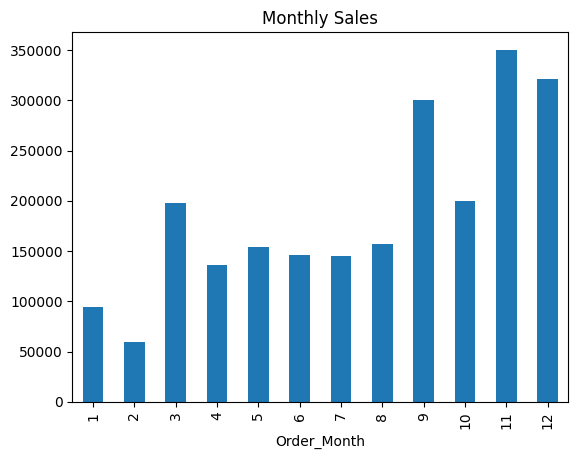

In [20]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind='bar')
plt.title("Monthly Sales")
plt.show()

In [21]:
df['Delivery_Days'].mean()

np.float64(3.9611224489795918)

In [23]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

In [25]:
features = df[['Delivery_Days', 'Order_Month', 'Order_Year']]
target = df['Sales']

In [26]:
features.head(), target.head()

(   Delivery_Days  Order_Month  Order_Year
 0              3           11        2017
 1              3           11        2017
 2              4            6        2017
 3              7           10        2016
 4              7           10        2016,
 0    261.9600
 1    731.9400
 2     14.6200
 3    957.5775
 4     22.3680
 Name: Sales, dtype: float64)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

In [28]:
X_train.shape, X_test.shape

((7840, 3), (1960, 3))

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

r2, mae

(-0.0034171061267833647, 303.0079436473116)

In [32]:
features = df[['Delivery_Days','Order_Month','Order_Year',
               'Category','Region','Segment','Ship Mode']]

In [33]:
features_encoded = pd.get_dummies(features)

In [34]:
features_encoded.shape

(9800, 17)

In [35]:
X = features_encoded
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

r2, mae

(0.041048347621987835, 274.6302824171275)

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

r2_rf, mae_rf

(-0.12288871608547458, 318.6682563028648)

In [37]:
df['Order_Day'] = df['Order Date'].dt.day
df['Order_Weekday'] = df['Order Date'].dt.weekday

In [38]:
features = df[['Delivery_Days','Order_Month','Order_Year',
               'Order_Day','Order_Weekday',
               'Category','Sub-Category',
               'Region','Segment','Ship Mode']]

In [39]:
features_encoded = pd.get_dummies(features)

In [40]:
X = features_encoded
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

r2, mae

(0.17853789435403689, 238.70524271913942)